<a href="https://colab.research.google.com/github/KzBrain/project/blob/main/HW4_I_hope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
require(readxl)
install.packages('skimr')
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
meta <- read_xlsx("/content/sample_data/metadata.xlsx",sheet = 1)
hdl <- read_tsv("/content/sample_data/high_density_lipids.tsv")
ldl <- read_tsv("/content/sample_data/low_density_lipids.tsv")

Rows: 27 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
cal_factor <- c('Patient.number','Vial.number')

hdl <- hdl[cal_factor] <- lapply(hdl[cal_factor],factor)

numeric_stats <- skimr::skim(select(meta,where(is.numeric)))

In [ ]:
head(meta)

Vial number,Patient number,Sucrose,Name,Group,Date,Age,Plasma volume,Ht,Wt,⋯,r lat max,r ant max,r pos max,l lat max,l ant max,l pos max,carotid IMT mean,Plaque,Statins,comorbidities
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,50,0,"Woodard, Dillon",0,2022-03-26,63,6.5,163,84.0,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425000,1,1,NA
2,51,0,"Kuck, Breanna",0,2023-12-23,47,5.5,179,111.0,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400000,1,0,NA
3,52,0,"Thomas, Terrance",1,2022-10-10,57,7.0,164,80.0,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,53,0,"Moua, Kensue",1,2022-12-21,72,5.0,160,58.8,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
5,54,0,"Soriano, Ryan",1,2023-03-16,57,5.0,180,71.0,⋯,1.20,1.20,1.25,1.10,1.30,1.13,1.0983333,1,1,NA
6,55,0,"Munoz-Lujan, Evangelina",1,2023-03-25,79,6.2,160,64.0,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"


In [ ]:
type_sum(meta)

[1] "tibble[,49]"

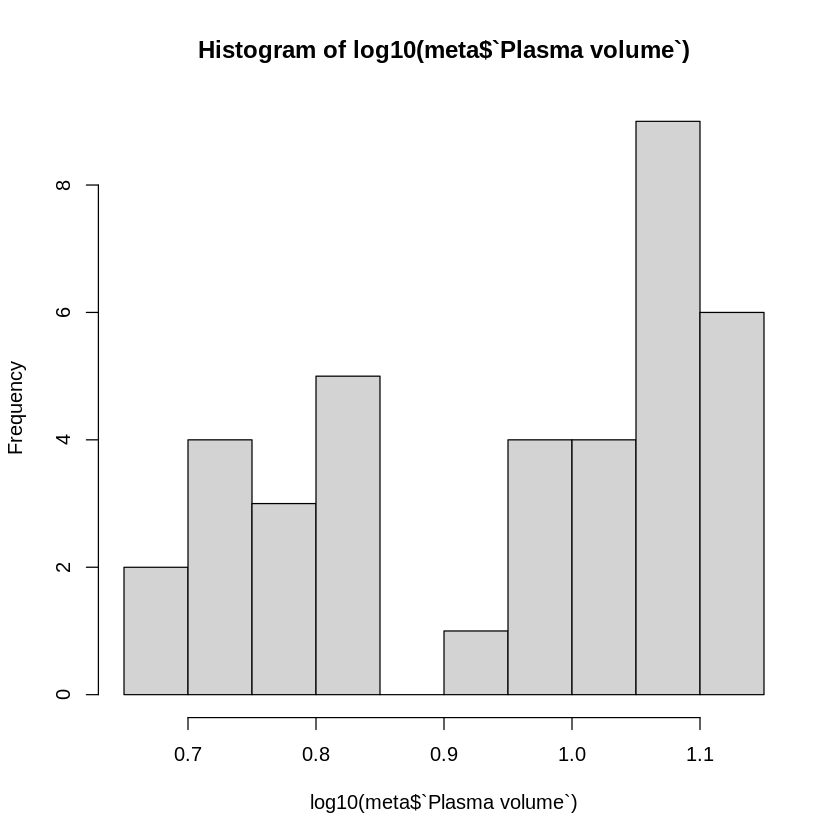

In [ ]:
hist(log10(meta$`Plasma volume`))

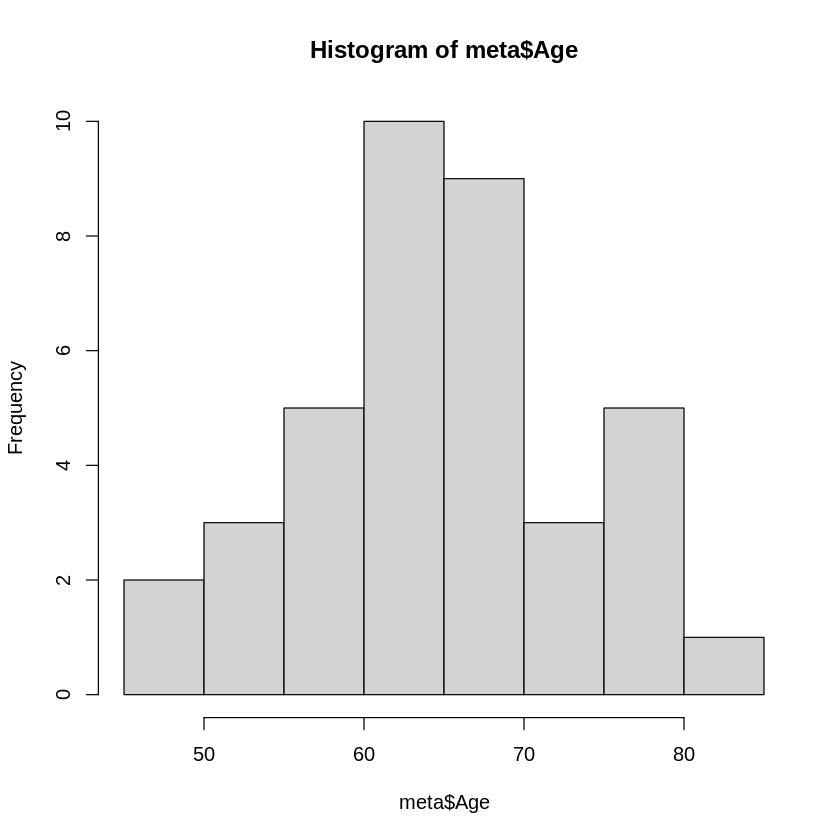

In [ ]:
hist(meta$Age)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


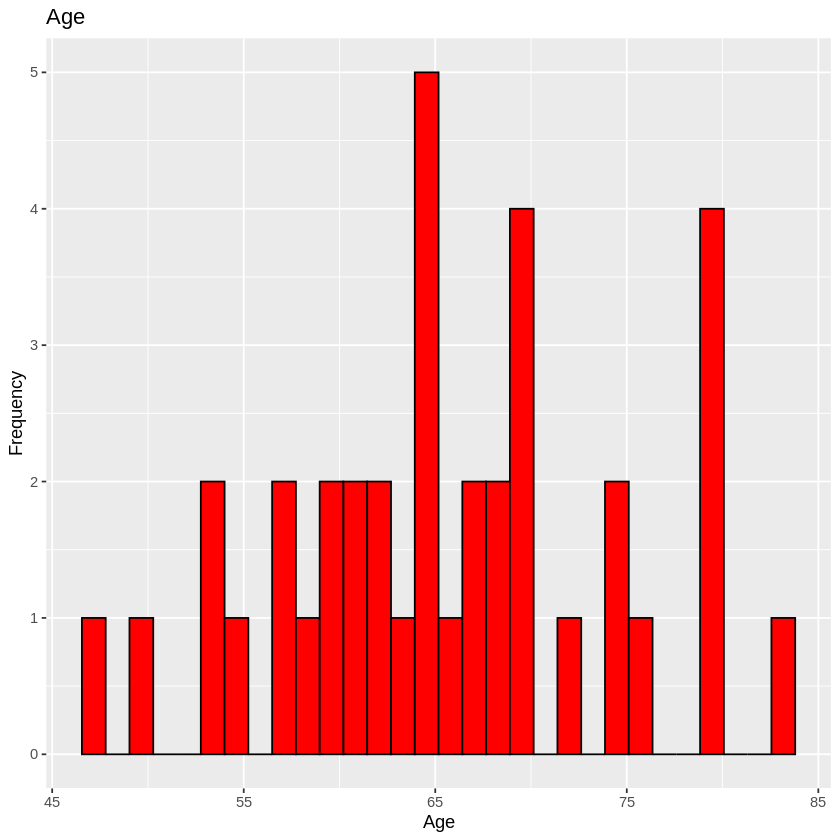

In [ ]:
ggplot(meta,aes(Age)) +
  geom_histogram(color='black',fill='red') +
  ggtitle("Age") +
  #cale_x_log10(name="log10 of DBP") +
  scale_y_continuous(name = "Frequency")

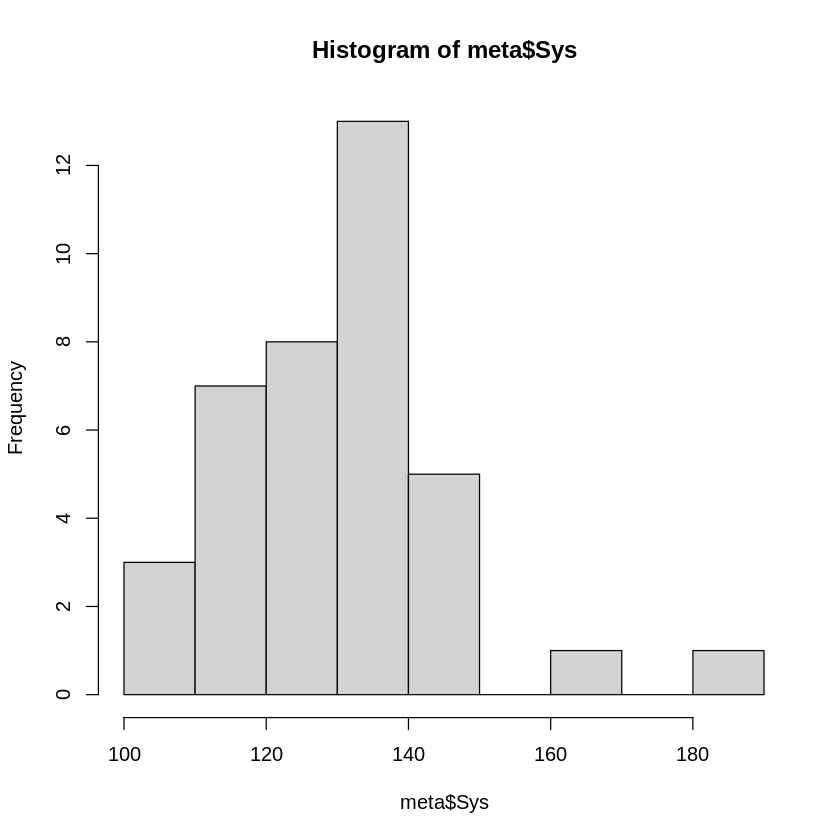

In [ ]:
hist(meta$Sys)

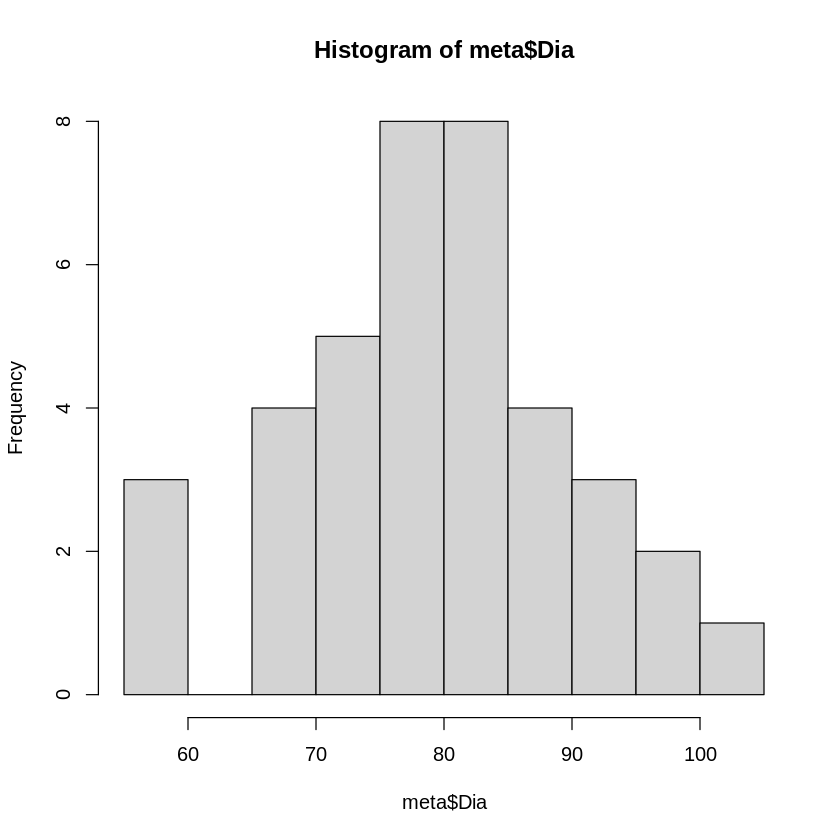

In [ ]:
hist(meta$Dia)

In [ ]:
cov(meta$Dia,meta$BMI)

[1] 24.40811

In [ ]:
cov(meta$Dia,meta$Sys)

[1] 86.10242

In [ ]:
cor.test(meta$Dia,meta$BMI)


	Pearson's product-moment correlation

data:  meta$Dia and meta$BMI
t = 2.8671, df = 36, p-value = 0.006882
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1292897 0.6598829
sample estimates:
      cor 
0.4311527 


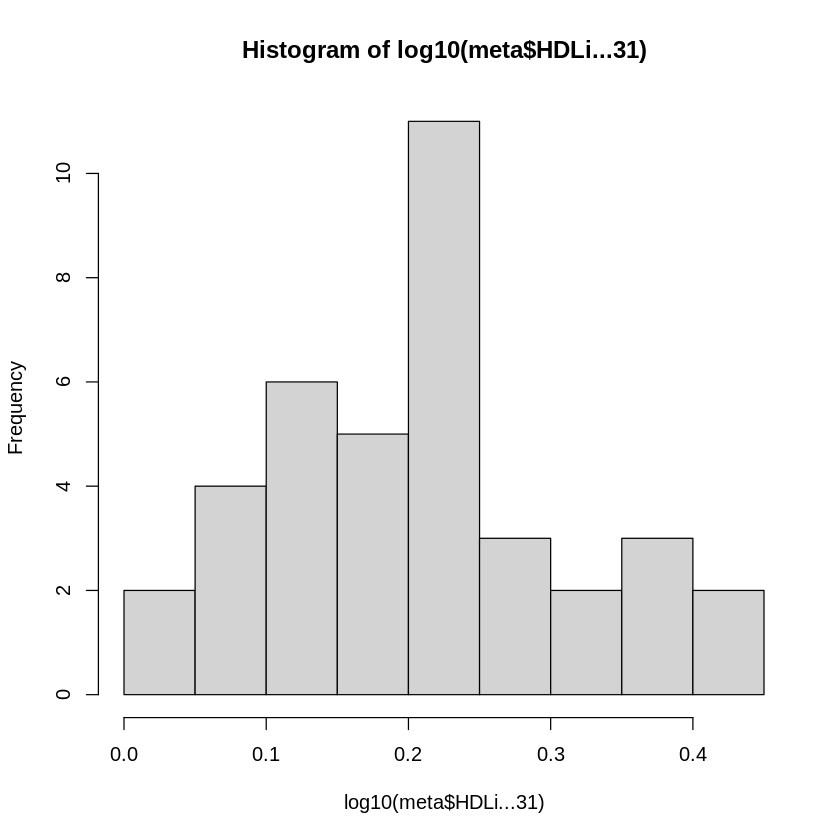

In [ ]:
hist(log10(meta$HDLi...31))

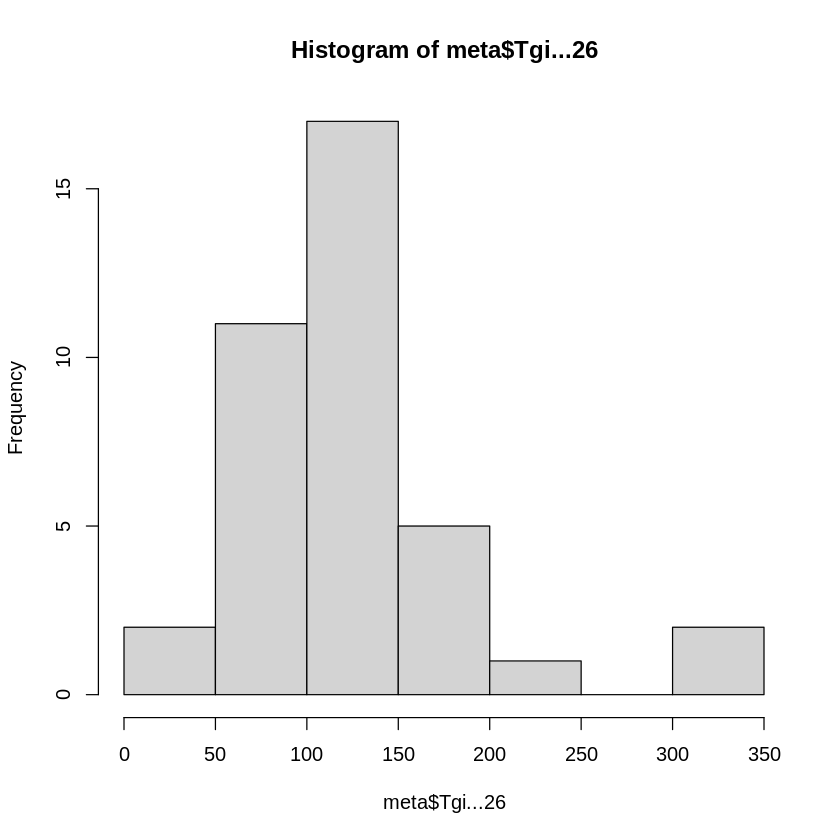

In [ ]:
hist(meta$Tgi...26)
meta$HDLi...31 <- log10(meta$HDLi...31)

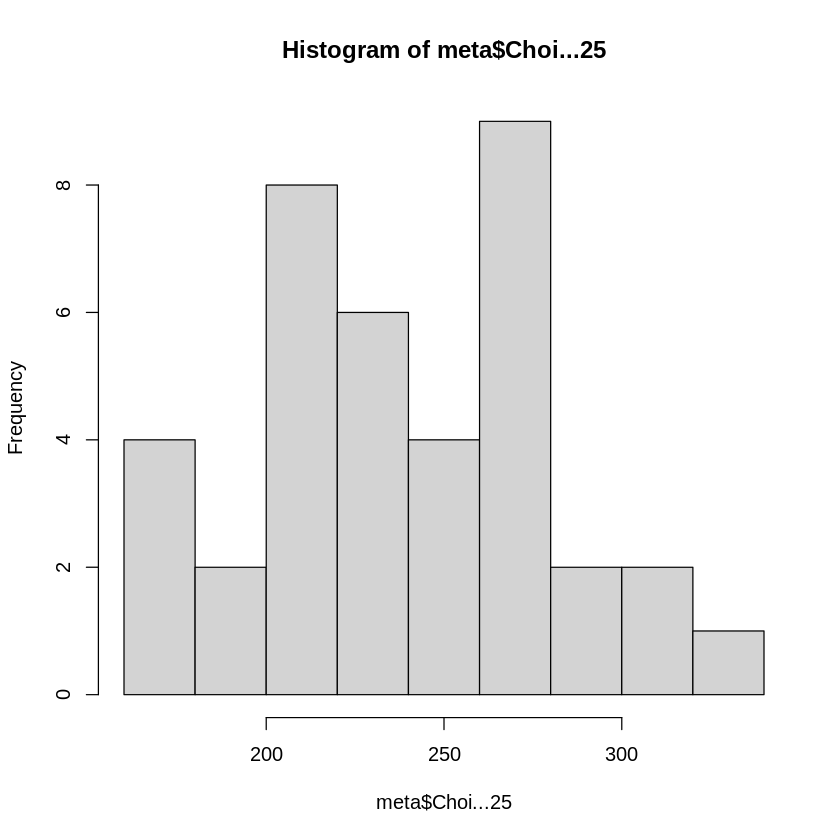

In [ ]:
hist(meta$Choi...25)

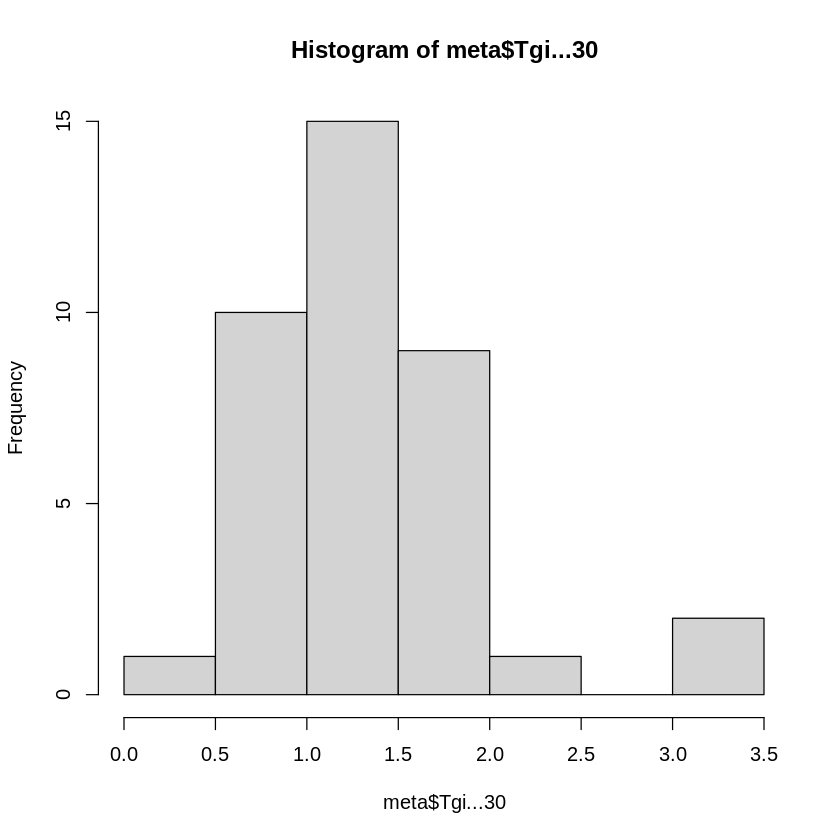

In [ ]:
hist(meta$Tgi...30)

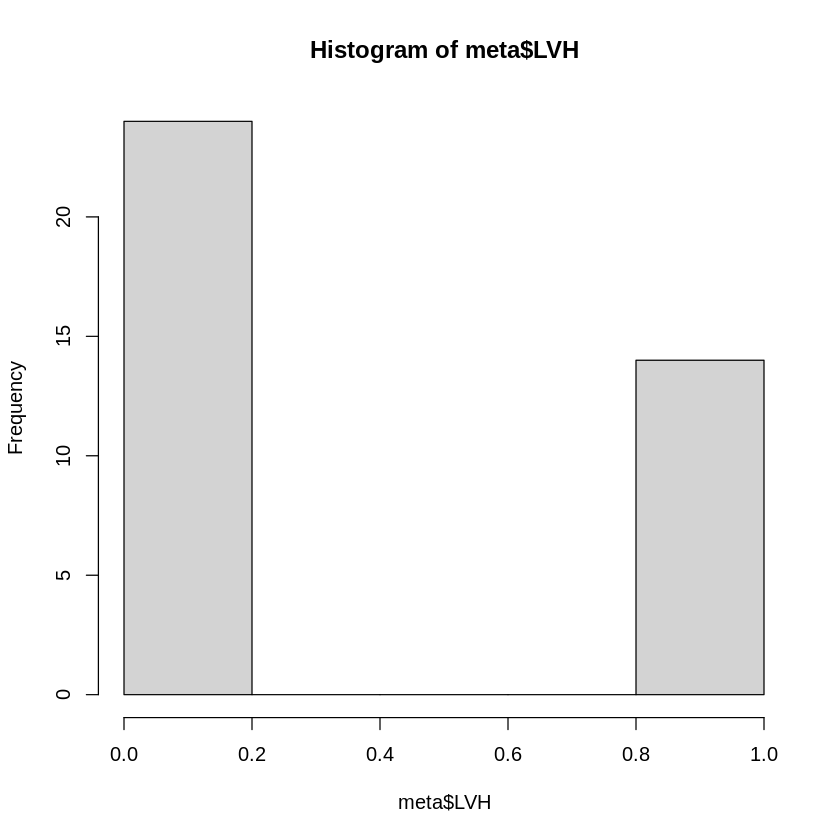

In [ ]:
hist(meta$LVH)

In [ ]:
cov(meta$Dm,meta$LDLi...28)

[1] -2.314509

In [ ]:
cov(meta$Dm,meta$Tgi...30)

[1] 0.0001250528

In [ ]:
cov(meta$LDLi...28,meta$AI)

[1] 31.96721

Working with Ancova

In [ ]:
#Generalized model
model.1 <- lm(AI ~ LDLi...28 + Dm +  LDLi...28:Dm,data = meta)
anova(model.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LDLi...28,1,23.43541407,23.43541407,84.48036667,9.657664e-11
Dm,1,0.96832070,0.96832070,3.49061840,7.035476e-02
LDLi...28:Dm,1,0.02398143,0.02398143,0.08644867,7.705290e-01
Residuals,34,9.43182552,0.27740663,NA,NA


In [ ]:
#Ancova model
model.2 <- lm(AI ~ LDLi...28 + Dm,data = meta)
anova(model.2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LDLi...28,1,23.4354141,23.4354141,86.744526,5.267606e-11
Dm,1,0.9683207,0.9683207,3.584171,6.662416e-02
Residuals,35,9.4558070,0.2701659,NA,NA


In [ ]:
# F-test
anova(model.1,model.2)
# Here we failed to reject null hypotthesis , there are no significant different between full model and ancova or reduced model

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,34,9.431826,NA,NA,NA,NA
2,35,9.455807,-1,-0.02398143,0.08644867,0.770529


In [ ]:
#Reduced linear model
model.3 <- lm(AI ~ LDLi...28,data = meta)
anova(model.3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LDLi...28,1,23.43541,23.4354141,80.93482,9.686851e-11
Residuals,36,10.42413,0.2895591,NA,NA


In [ ]:
# F-test 2
anova(model.2,model.3)
#here we found Dm variable not statistically significant

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,35,9.455807,NA,NA,NA,NA
2,36,10.424128,-1,-0.9683207,3.584171,0.06662416


In [ ]:
model.2 <- lm(AI ~ LDLi...28 + Dm,data = meta)
summary(model.2)
#Dm factor  we failed reject null hypothesis and cannot use this varialble in ancova model


Call:
lm(formula = AI ~ LDLi...28 + Dm, data = meta)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16958 -0.30738 -0.08917  0.37605  1.00874 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.622746   0.346884  -1.795   0.0813 .  
LDLi...28    0.020573   0.002165   9.503 3.16e-11 ***
Dm           0.529318   0.279590   1.893   0.0666 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5198 on 35 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.7048 
F-statistic: 45.16 on 2 and 35 DF,  p-value: 2.02e-10


Manova

In [ ]:
df <- read.csv("/content/sample_data/skulls.csv")
head(df)
#In this dataset were measured the size of skulls in different time of history . We wanna find out here had size changed throuhout time

,X,epoch,mb,bh,bl,nh
,<int>,<chr>,<int>,<int>,<int>,<int>
1,1,c4000BC,131,138,89,49
2,2,c4000BC,125,131,92,48
3,3,c4000BC,131,132,99,50
4,4,c4000BC,119,132,96,44
5,5,c4000BC,136,143,100,54
6,6,c4000BC,138,137,89,56


In [ ]:
dim(df)

[1] 150   6

In [ ]:
attach(df)
str(df)

The following objects are masked from df (pos = 3):

    bh, bl, epoch, mb, nh, X


The following objects are masked from df (pos = 4):

    bh, bl, epoch, mb, nh, X




'data.frame':	150 obs. of  6 variables:
 $ X    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ epoch: chr  "c4000BC" "c4000BC" "c4000BC" "c4000BC" ...
 $ mb   : int  131 125 131 119 136 138 139 125 131 134 ...
 $ bh   : int  138 131 132 132 143 137 130 136 134 134 ...
 $ bl   : int  89 92 99 96 100 89 108 93 102 99 ...
 $ nh   : int  49 48 50 44 54 56 48 48 51 51 ...


In [ ]:
manova1 <- manova(cbind(mb, bh, bl, nh) ~ epoch,data = df)
summary(manova1)
# We can see here that independent variable "epoch" statistically signifacnt . There are relation between size and timeline

           Df  Pillai approx F num Df den Df    Pr(>F)    
epoch       4 0.35331    3.512     16    580 4.675e-06 ***
Residuals 145                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
summary.aov(manova1)

 Response mb :
             Df  Sum Sq Mean Sq F value    Pr(>F)    
epoch         4  502.83 125.707  5.9546 0.0001826 ***
Residuals   145 3061.07  21.111                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response bh :
             Df Sum Sq Mean Sq F value  Pr(>F)  
epoch         4  229.9  57.477  2.4474 0.04897 *
Residuals   145 3405.3  23.485                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response bl :
             Df Sum Sq Mean Sq F value    Pr(>F)    
epoch         4  803.3 200.823  8.3057 4.636e-06 ***
Residuals   145 3506.0  24.179                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response nh :
             Df Sum Sq Mean Sq F value Pr(>F)
epoch         4   61.2  15.300   1.507 0.2032
Residuals   145 1472.1  10.153               


In [ ]:
model <- aov(formula = Dia ~ Age*BMI, data = meta)

summary(model)
# В этом тесте НП Age and BMI имеют F- stat меньше чем 0,05 что означает что имеют значительный
# эффект потомучто опровергают H0 гипотезу и  имеют не равную дисперсию

            Df Sum Sq Mean Sq F value Pr(>F)  
Age          1    549   548.7   5.725 0.0224 *
BMI          1    437   436.8   4.558 0.0401 *
Age:BMI      1     97    96.9   1.011 0.3217  
Residuals   34   3258    95.8                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
meta$Sm <- as.factor(meta$Sm)
meta$MI <- as.factor(meta$MI)

anov2 <- aov(formula = Sys ~ Sm*MI, data = meta)

summary(anov2)

#  suggests that there is a no significant difference between the groups.

            Df Sum Sq Mean Sq F value Pr(>F)
Sm           1     10    9.83   0.037  0.849
MI           1    155  155.31   0.582  0.451
Residuals   35   9336  266.75               

In [ ]:
tukey_results <- TukeyHSD(anov2)
print(tukey_results)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sys ~ Sm * MI, data = meta)

$Sm
         diff       lwr      upr     p adj
1-0 -1.885714 -21.83228 18.06085 0.8489117

$MI
        diff       lwr      upr     p adj
1-0 6.554202 -10.97222 24.08063 0.4528269



In [ ]:
#Из результатов видно, что различия не являются статистически значимыми на уровне доверия 0.05 для ни одного из факторов. В обоих случаях p-значение больше, чем уровень значимости 0.05,
#что означает, что мы не можем отвергнуть нулевую гипотезу о равенстве средних между уровнями факторов.

In [ ]:
kruskal.test(meta)
#We can say the mean values of the columns are not the same

Warning message in kruskal.test.default(meta):
“some elements of 'x' are not numeric and will be coerced to numeric”



	Kruskal-Wallis rank sum test

data:  meta
Kruskal-Wallis chi-squared = 1518.7, df = 47, p-value < 2.2e-16
